In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [117]:
# Fetch Breast Cancer Dataset:
#ucimlrepo.list_available_datasets()
# See: https://github.com/uci-ml-repo/ucimlrepo
#breast_cancer_df = fetch_ucirepo(id=15)

# Data processing
X = breast_cancer_df.data.features.Uniformity_of_cell_shape
y = breast_cancer_df.data.targets

# metadata
print(breast_cancer_df.metadata)

# variable information
print(breast_cancer_df.variables)

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

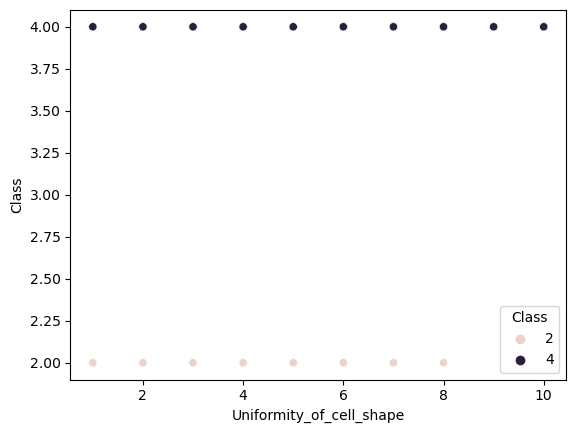

In [172]:
# Plot the selected feature (Uniformity_of_cell_shape) and target variable (Class of Breast cancer)

plt1 = sns.scatterplot(x=X.to_frame()['Uniformity_of_cell_shape'],y=y['Class'], hue=y['Class'])

In [119]:
# The Target variable corresponds to the 'Class' column with possible classification values  2 = benign, 4 = malignant.
print(breast_cancer_df.variables)
y.value_counts()

                           name     role         type demographic  \
0            Sample_code_number       ID  Categorical        None   
1               Clump_thickness  Feature      Integer        None   
2       Uniformity_of_cell_size  Feature      Integer        None   
3      Uniformity_of_cell_shape  Feature      Integer        None   
4             Marginal_adhesion  Feature      Integer        None   
5   Single_epithelial_cell_size  Feature      Integer        None   
6                   Bare_nuclei  Feature      Integer        None   
7               Bland_chromatin  Feature      Integer        None   
8               Normal_nucleoli  Feature      Integer        None   
9                       Mitoses  Feature      Integer        None   
10                        Class   Target       Binary        None   

                  description units missing_values  
0                        None  None             no  
1                        None  None             no  
2           

Class
2        458
4        241
dtype: int64

In [ ]:
# Check for NA values
nan_indices = np.isnan(X_test)
nan_count = np.sum(nan_indices)
nan_count

# Check for Inf values:
inf_indices = np.isinf(X_test)
inf_count = np.sum(inf_indices)
inf_count

In [126]:
X_train

216     1
592     4
667     1
621     3
487    10
       ..
122    10
547     1
513     1
392     1
576     1
Name: Uniformity_of_cell_shape, Length: 559, dtype: int64

In [127]:
# Split the data into training and test datasets:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
#np.ravel(y_train)
# Scale and center the data:
scaler = StandardScaler()

# Impute missing data
imputer = SimpleImputer(strategy="mean")

X_train_imputed = imputer.fit_transform(np.array(X_train).reshape(-1,1)) # Reshaping the data to 1 dimensional numpy array as we are using only one feature for classification.
X_test_imputed = imputer.fit_transform(np.array(X_test).reshape(-1,1))

X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.fit_transform(X_test_imputed)


knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_scaled,np.ravel(y_train))
y_pred = knn.predict(X_test_scaled)
y_pred
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)


Accuracy: 0.9285714285714286


Text(0, 0.5, 'Accuracy score')

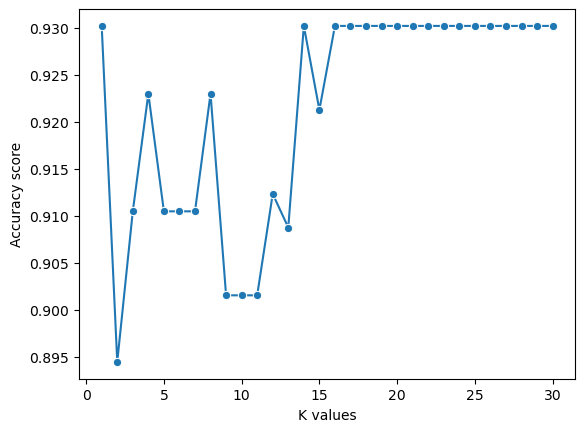

In [130]:
# Using cross-validation to estimate the best value of k neighbours:
k_vals = [i for i in range(1,31)]
cv_scores = []

for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_score = cross_val_score(knn,X_train_scaled,np.ravel(y_train),cv=5)
    cv_scores.append(np.mean(cv_score))

# Plot the cross-validation results:
plt = sns.lineplot(x=k_vals,y=cv_scores, marker='o')
plt.set_xlabel("K values")
plt.set_ylabel("Accuracy score")



,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
204,1,1,1,1,2,1.0,3,1,1
256,3,1,1,1,2,1.0,1,1,1
142,9,5,5,4,4,5.0,4,3,3
284,7,4,5,10,2,10.0,3,8,2
115,1,1,1,1,2,5.0,1,1,1
